<a href="https://colab.research.google.com/github/Vrushti-kulkarni/Specie_predictor_flask/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/random_Forest.csv')

In [4]:
df.shape

(777715, 20)

In [5]:
df.dtypes

,0
ID,int64
gender,object
has_car,object
has_home,object
no_of_children,int64
total_income,float64
income_status,object
highest_education,object
relationship_status,object
house_type,object


In [6]:
df.head(5)

,ID,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,job_type,family_size,record_month_count,def_status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-4,C


In [7]:
df.isnull().sum()

,0
ID,0
gender,0
has_car,0
has_home,0
no_of_children,0
total_income,0
income_status,0
highest_education,0
relationship_status,0
house_type,0


In [8]:
x = df.isnull().mean() * 100
print(x)

ID                      0.000000
gender                  0.000000
has_car                 0.000000
has_home                0.000000
no_of_children          0.000000
total_income            0.000000
income_status           0.000000
highest_education       0.000000
relationship_status     0.000000
house_type              0.000000
dob_count               0.000000
days_employed_Count     0.000000
has_mobile              0.000000
has_work_phone          0.000000
has_Any_phone           0.000000
email_given             0.000000
job_type               30.865806
family_size             0.000000
record_month_count      0.000000
def_status              0.000000
dtype: float64


In [9]:
df.shape

(777715, 20)

**dropping job type as we already have a column specifying income**

In [10]:
df.drop(['job_type'], axis = 1, inplace = True)

In [11]:
df.head(5)

,ID,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,family_size,record_month_count,def_status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-4,C


In [12]:
df.drop(['ID'], axis = 1, inplace = True)

In [13]:
df['highest_education'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

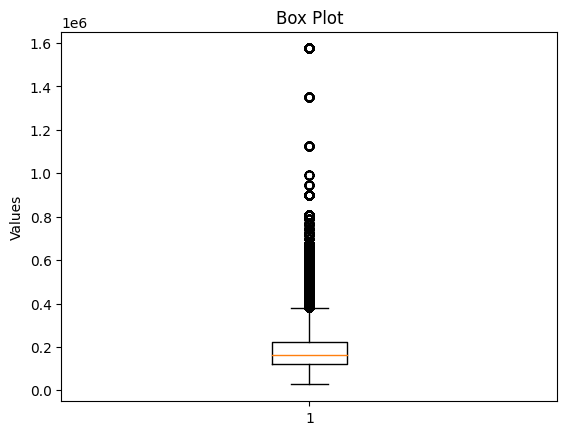

In [14]:
plt.boxplot(df['total_income'])
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()

no need to remove outliers as randomforest is robust to outliers

**LABEL-ENCODING**

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le_edu = LabelEncoder()
le_gender = LabelEncoder()
le_car = LabelEncoder()
le_home = LabelEncoder()
le_income_status = LabelEncoder()
le_relationship = LabelEncoder()
le_house_type = LabelEncoder()
df['def_status'] = le.fit_transform(df['def_status'])
df['highest_education'] = le_edu.fit_transform(df['highest_education'])
df['gender'] = le_gender.fit_transform(df['gender'])
df['has_car'] = le_car.fit_transform(df['has_car'])
df['income_status'] = le_income_status.fit_transform(df['income_status'])
df['relationship_status'] = le_relationship.fit_transform(df['relationship_status'])
df['house_type'] = le_house_type.fit_transform(df['house_type'])
df['has_home'] = le_home.fit_transform(df['has_home'])

In [17]:
corr_matrix = df[['has_mobile', 'has_work_phone','has_Any_phone','email_given','family_size','record_month_count','def_status']].corr()


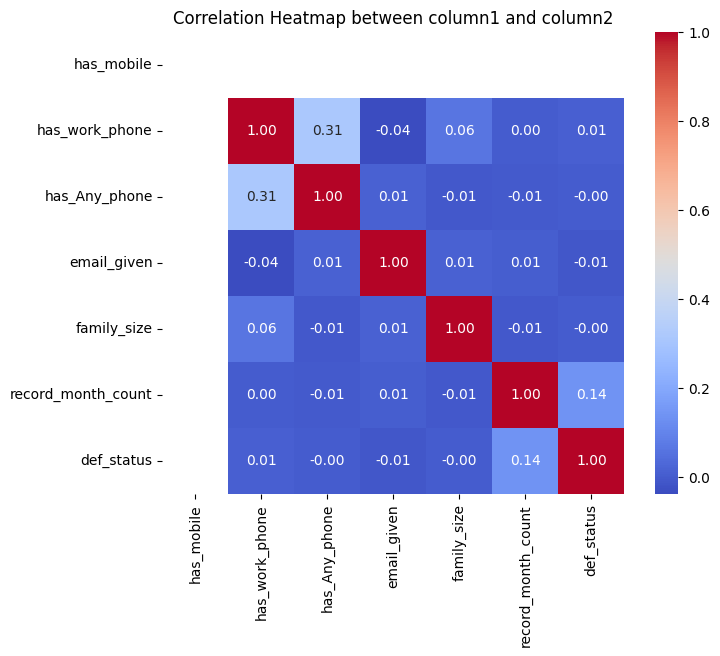

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f', cbar=True)
plt.title('Correlation Heatmap between column1 and column2')
plt.show()

In [19]:
df.drop(['has_work_phone','has_Any_phone','email_given','record_month_count'], axis = 1, inplace = True)

In [20]:
corr_matrix = df[['days_employed_Count','def_status']].corr()

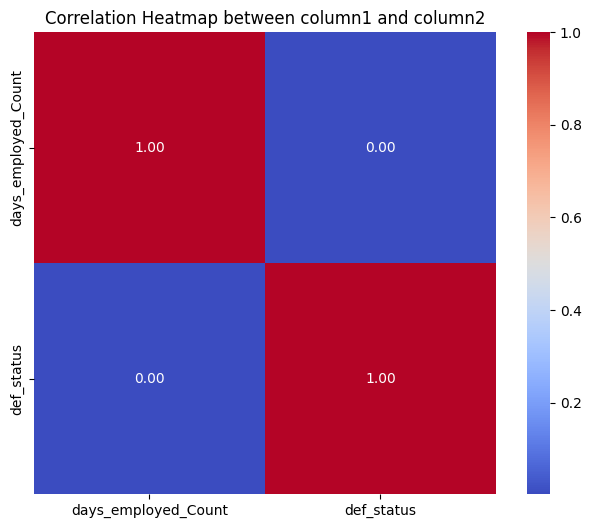

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f', cbar=True)
plt.title('Correlation Heatmap between column1 and column2')
plt.show()

In [22]:
df.drop(['days_employed_Count'], axis = 1, inplace = True)

In [23]:
df.head(5)

,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,has_mobile,family_size,def_status
0,1,1,1,0,427500.0,4,1,0,4,-12005,1,2,6
1,1,1,1,0,427500.0,4,1,0,4,-12005,1,2,6
2,1,1,1,0,427500.0,4,1,0,4,-12005,1,2,6
3,1,1,1,0,427500.0,4,1,0,4,-12005,1,2,6
4,1,1,1,0,427500.0,4,1,0,4,-12005,1,2,6


In [24]:
df.head(2)

,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,has_mobile,family_size,def_status
0,1,1,1,0,427500.0,4,1,0,4,-12005,1,2,6
1,1,1,1,0,427500.0,4,1,0,4,-12005,1,2,6


In [25]:
from datetime import datetime, timedelta

In [26]:
current_date = pd.Timestamp(datetime.now())
df['birth_date'] = current_date + pd.to_timedelta(df['dob_count'], unit='D')

In [27]:
df['age'] = current_date.year - df['birth_date'].dt.year

In [28]:
df.drop(['dob_count','birth_date'], axis = 1, inplace = True)

In [29]:
df.head(5)

,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,has_mobile,family_size,def_status,age
0,1,1,1,0,427500.0,4,1,0,4,1,2,6,33
1,1,1,1,0,427500.0,4,1,0,4,1,2,6,33
2,1,1,1,0,427500.0,4,1,0,4,1,2,6,33
3,1,1,1,0,427500.0,4,1,0,4,1,2,6,33
4,1,1,1,0,427500.0,4,1,0,4,1,2,6,33


In [30]:
df.shape

(777715, 13)

In [31]:
df['def_status'].value_counts()

,count
def_status,
6,329536
0,290654
7,145950
1,8747
5,1527
2,801
3,286
4,214


In [32]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('def_status', axis = 1), df['def_status'], test_size=0.2, random_state=42)

In [34]:
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(random_state=42)

In [35]:
y_pred = brf.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[14947  9295  3993  2619  2375  1502 12722 10550]
 [  209   590   239    84   111    60   258   192]
 [    7    15    49    27    33     6     7     6]
 [    1     1     8     9    22     9     1     1]
 [    0     0     0    12    13     7     1     0]
 [    0     0     0    27   102   175     2     1]
 [13494  9441  4348  3097  2374  1667 20332 11473]
 [ 4978  3271  1845  1220  1171   736  4790 11018]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.26      0.33     58003
           1       0.03      0.34      0.05      1743
           2       0.00      0.33      0.01       150
           3       0.00      0.17      0.00        52
           4       0.00      0.39      0.00        33
           5       0.04      0.57      0.08       307
           6       0.53      0.31      0.39     66226
           7       0.33      0.38      0.35     29029

    accuracy                           0.30    155543
   ma

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [39]:
y_pred_smote = rf.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_smote))

Confusion Matrix:
 [[24393  6581   926   301   323   572 15042  9865]
 [  260   855   120    17    28    51   241   171]
 [    6    40    30    14    17    15    14    14]
 [    2     3    14     3     8    16     1     5]
 [    0     1     3     6     9    14     0     0]
 [    5     6     6     7    22   259     0     2]
 [10120  6286  1212   466   291   493 38395  8963]
 [ 3514  1733   441   200    79   264  3794 19004]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.42      0.51     58003
           1       0.06      0.49      0.10      1743
           2       0.01      0.20      0.02       150
           3       0.00      0.06      0.01        52
           4       0.01      0.27      0.02        33
           5       0.15      0.84      0.26       307
           6       0.67      0.58      0.62     66226
           7       0.50      0.65      0.57     29029

    accuracy                           0.53    155543
   ma

In [41]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs = -1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


PicklingError: Could not pickle the task to send it to the workers.